
Demos - Geo - Python Contextily package
=======================================


# References
* Source: [Medium - 5 Visualizations with Python to Show Simultaneous Changes in Geospatial Data](https://towardsdatascience.com/5-visualizations-with-python-to-show-simultaneous-changes-in-geospatial-data-ddc2eaab9d78)
  + Date: Nov. 2023
  + Author: Boriharn K.

## DataBicks notebooks
* [Notebook - Demos - Geo - Python Contextily package (this notebook)](https://github.com/data-engineering-helpers/databricks-examples/blob/main/ipython-notebooks/demos-geo-python-contextily-package.ipynb)
* [Notebook - Demos - Geo - Show Simultaneous Changes in Geospatial Data - Part 1](https://github.com/data-engineering-helpers/databricks-examples/blob/main/ipython-notebooks/demos-geo-show-simultaneous-changes-in-geospatial-data-1_2.ipynb)

## Contextily
* Contextily home page: https://contextily.readthedocs.io/en/latest/intro_guide.html


In [0]:
%pip install geopandas contextily

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached geopandas-0.14.0-py3-none-any.whl (1.1 MB)
  Using cached contextily-1.4.0-py3-none-any.whl (16 kB)
  Using cached fiona-1.9.5-cp310-cp310-manylinux2014_x86_64.whl (15.7 MB)
  Using cached shapely-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.5 MB)
  Using cached pyproj-3.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached xyzservices-2023.10.1-py3-none-any.whl (56 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached rasterio-1.3.9-cp310-cp310-manylinux2014_x86_64.whl (20.6 MB)
  Using cached geopy-2.4.0-py3-none-any.whl (125 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached affine-2.4.0-py3-non

In [0]:
import contextily as cx
import geopandas
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

In [0]:
data_url = "https://ndownloader.figshare.com/files/20232174"

In [0]:
db = geopandas.read_file(data_url)

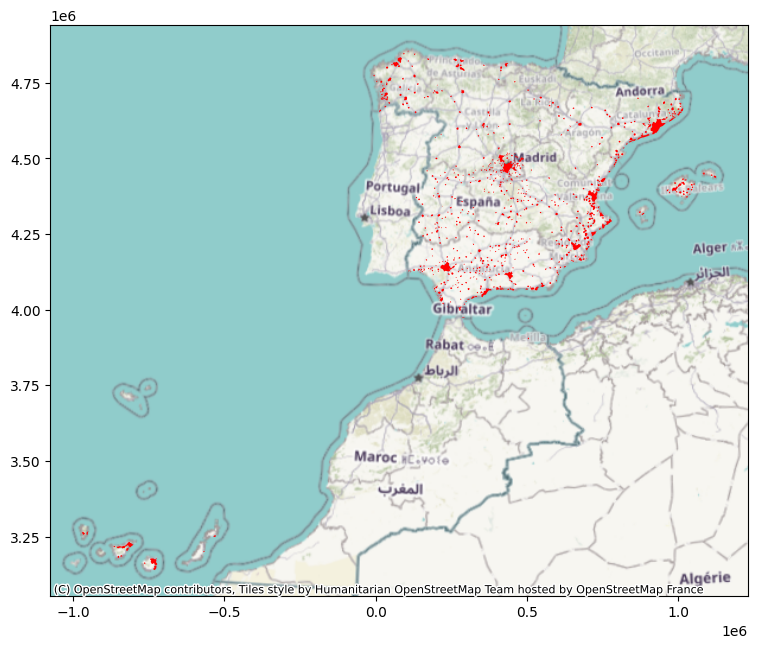

In [0]:
ax = db.plot(color="red", figsize=(9, 9))
cx.add_basemap(ax, crs=db.crs.to_string())

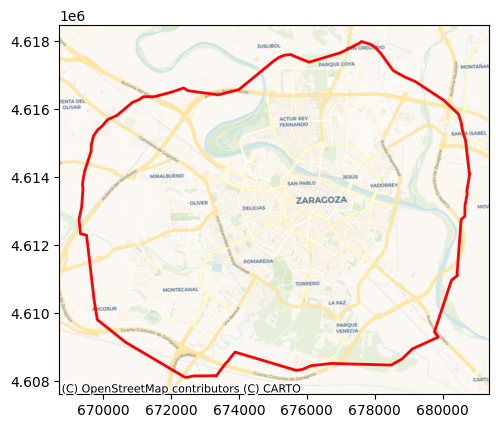

In [0]:
zaragoza = db.query("city_id == 'ci122'")
ax = zaragoza.plot(facecolor="none",
                   edgecolor="red",
                   linewidth=2
                  )
cx.add_basemap(ax,
               crs=zaragoza.crs.to_string(),
               source=cx.providers.CartoDB.Voyager
              )

In [0]:
cx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<insert 

In [0]:
cx.providers.OpenStreetMap

{'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.Mapnik'},
 'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.DE'},
 'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'bounds': [[45, 5], [48, 11]],
  'name': 'OpenStreetMap.CH'},
 'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
  'max_zoom': 20,
  'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.France'},
 'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
  'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
  'name': 'OpenStreetMap.HOT'},
 'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
  'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
  'bounds': [[46.2, -5.5], [50, 0.7]],
  'name': 'OpenStreetMap.BZH'},
 'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'attribution': '(C) OpenStreetMap contributors',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'name': 'OpenStreetMap.BlackAndWhite'}}

In [0]:
west, south, east, north = (
    3.616218566894531,
    50.98912458110244,
    3.8483047485351562,
    51.13994019806845
             )

In [0]:
ghent_img, ghent_ext = cx.bounds2img(west,
                                     south,
                                     east,
                                     north,
                                     ll=True,
                                     source=cx.providers.Stamen.Toner
                                    )

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /local_disk0/.ephemeral_nfs/envs/pythonEnv-c7467509-edd5-4a85-b23b-4c1c42548f2f/lib/python3.10/site-packages/xyzservices/lib.py:44, in Bunch.__getattr__(self, key)
     43 try:
---> 44     return self.__getitem__(key)
     45 except KeyError as err:

KeyError: 'Stamen'

The above exception was the direct cause of the following exception:

AttributeError                            Traceback (most recent call last)
File <command-4417673118071757>, line 6
      1 ghent_img, ghent_ext = cx.bounds2img(west,
      2                                      south,
      3                                      east,
      4                                      north,
      5                                      ll=True,
----> 6                                      source=cx.providers.Stamen.Toner
      7                                     )

F

In [0]:
ghent_img.shape

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-4417673118071760>, line 1
----> 1 ghent_img.shape

NameError: name 'ghent_img' is not defined